In [3]:
import rioxarray
import rasterio
from rasterio.transform import from_origin
import numpy as np
import xarray as xr
import os


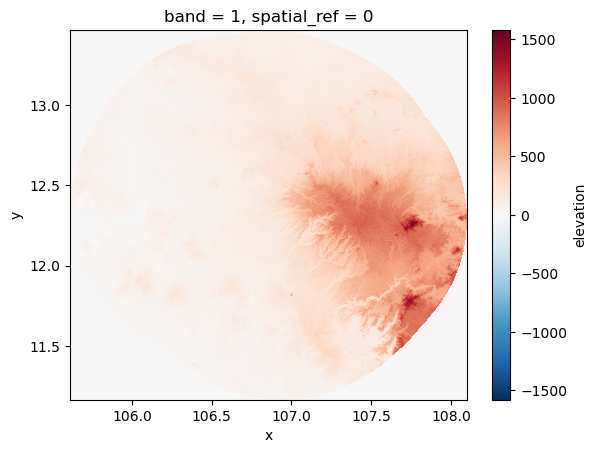

In [6]:
# Load DEM and set resolution 
dem_path = 'NASADEM_AOI_Asset_SYL2371650_100km.tif' ### Set asset to load here 
dem_data = rioxarray.open_rasterio(dem_path)
dem_data.plot()

resolution_x = 30  # Update based on spatial resolution of DEM
resolution_y = 30  # Update based on spatial resolution of DEM


In [7]:
# Define slope function 
def calculate_slope(dem_array, resolution_x, resolution_y):
    x, y = np.gradient(dem_array, resolution_x, resolution_y)
    slope = np.degrees(np.arctan(np.sqrt(x**2 + y**2)))
    return slope

# Function for exporting slope 
def export_slope_to_tif(slope_xarray, output_path, original_dem_data):
    # Get the CRS and transform from the original DEM data
    crs = original_dem_data.rio.crs
    transform = original_dem_data.rio.transform()
    
    # Define metadata for the GeoTIFF
    new_dataset = rasterio.open(
        output_path,
        'w',
        driver='GTiff',
        height=slope_xarray.shape[0],
        width=slope_xarray.shape[1],
        count=1,
        dtype=slope_xarray.dtype,
        crs=crs,  # Use the CRS from the original DEM data
        transform=transform,  # Use the transform from the original DEM data
    )
    
    # Write the data to the GeoTIFF
    new_dataset.write(slope_xarray.values, 1)
    new_dataset.close()

In [8]:

# Extract DEM as a data array
dem_array = dem_data[0].values

# Calculate slope 
slope_data = calculate_slope(dem_array, resolution_x, resolution_y)

# Convert slope_data back into a data array
slope_xarray = xr.DataArray(slope_data, dims=["y", "x"], coords={"y": dem_data.y, "x": dem_data.x})

# Set the output file name based on the input file path (dem_path)
output_tif_path = f"{os.path.splitext(dem_path)[0]}_SLOPE.tif"

# Export slope data to the specified file
export_slope_to_tif(slope_xarray, output_tif_path, dem_data)

print(f'Slope data exported to {output_tif_path}')


Slope data exported to NASADEM_AOI_Asset_SYL2371650_100km_SLOPE.tif
